In [1]:
import pandas as pd
import statsmodels.formula.api as smf #수식문자열과 데이터프레임 함수 지원
df = pd.read_csv('datasets/Ashopping.csv', sep=',', encoding='CP949')

In [2]:
model1=smf.ols(formula='총_매출액~방문빈도',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총_매출액   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     660.8
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          3.05e-112
Time:                        10:53:44   Log-Likelihood:                -16921.
No. Observations:                1000   AIC:                         3.385e+04
Df Residuals:                     998   BIC:                         3.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.572e+06   2.74e+05      5.743      0.000    1.03e+06    2.11e+06
방문빈도        2.066e+05   8037.616     25.707      0.000    1.91e+05    2.22e+05
==============================================================================
Omnibus:                      684.213   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17231.472
Skew:                           2.760   Prob(JB):                         0.00
Kurtosis:                      22.573   Cond. No.                         54.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prob F-Value는 F검정통계량의 유의확률인데, 0.01 이하이므로 본 회귀모형은 유의미하다고 판단할 수 있다.  
모형의 결정계수, 설명력은 0.398 수준으로 나타났다. 총 매출액의 39.8%를 설명한다.  
95% 신뢰 구간의 하한값과 상한값을 제시한다. 절편(intercept)과 독립변수(방문빈도)는 모두 유의하게 나타났다.  
Durbin-Watson값은 잔차의 독립성을 확인하는 값으로 2에 가까울수록 독립적이라고 판단한다.  
Prob(Omnibus)은 0.000으로 귀무가설인 정규분포를 기각하므로 잔차가 정규분포라 보기 어렵다.  
Cond. No.는 54.6로 30보다 작으면 다중공선성이 없다고 판단한다. (독립변수가 1개 일때는 무의미)

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Malgun Gothic'

In [6]:
fit=np.polyfit(df['방문빈도'],df['총_매출액'],1)
fit_fn=np.poly1d(fit)
print(np.round(fit,3))
print(fit_fn)

[ 206622.163 1572126.981]
 
2.066e+05 x + 1.572e+06


절편값은 1572126, 독립변수 x의 계수는 206622이므로   
회귀식은 총매출액 = 206622 x 방문빈도 + 1572126 이다.

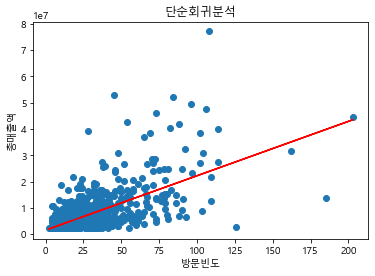

In [5]:
#4. 산점도와 선형회귀선 그리기
%matplotlib inline
plt.title('단순회귀분석') #차트 제목
plt.xlabel('방문빈도') # X축 이름
plt.ylabel('총매출액') # Y축 이름
plt.plot(df['방문빈도'], df['총_매출액'],'o')
plt.plot(df['방문빈도'], fit_fn(df['방문빈도']), 'r')

#### 다중회귀분석  
H0(귀무가설):서비스만족도, 방문횟수, 구매카테고리 수는 총 매출액에 영향을 미치지 않는다.   
H1(대립가설):서비스만족도, 방문횟수, 구매카테고리 수는 총 매출액에 영향을 미친다.

In [8]:
from patsy import dmatrices #다중공선성 확인:회귀분석 전처리 지원
from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공선성 확인:단순회귀분석 및 분산팽창값 계산 

In [9]:
df = pd.read_csv('datasets/Ashopping.csv', sep=',', encoding='CP949')

In [11]:
# 다중 회귀분석 실행
model2 = smf.ols(formula = '총_매출액~서비스_만족도+방문빈도+구매_카테고리_수', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총_매출액   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          1.19e-113
Time:                        11:22:04   Log-Likelihood:                -16911.
No. Observations:                1000   AIC:                         3.383e+04
Df Residuals:                     996   BIC:                         3.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.033e+06   1.01e+06      2.009      0.045    4.76e+04    4.02e+06
서비스_만족도    -5.432e+05   1.52e+05     -3.585      0.000   -8.41e+05   -2.46e+05
방문빈도        2.053e+05   8938.286     22.973      0.000    1.88e+05    2.23e+05
구매_카테고리_수   5.022e+05    1.6e+05      3.142      0.002    1.89e+05    8.16e+05
==============================================================================
Omnibus:                      673.428   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16237.956
Skew:                           2.711   Prob(JB):                         0.00
Kurtosis:                      21.982   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F 값이 280.8, Prob (F-statistic)이 0.01이하 이므로 회귀모형은 유의하다.   
Adj. R-squared 기준으로 모형의 40.8%를 설명한다.  
서비스 만족도, 방문빈도, 구매 카테고리 수 모두 P-value가 0.01 이하로 95% 신뢰수준에서 유의하다.  
도출된 회귀식은 매출액=2033000 -543200x서비스만족도 + 205300x방문빈도 + 502200x구매카테고리수 이다.  
잔차 통계량 확인결과, Durbin-Watson이 2에 가까우므로 독립적이다.  
Prob(Omnibus)가 0이므로 귀무가설을 기각하여 잔차는 정규분포가 아니다.  

In [15]:
y, X = dmatrices('총_매출액~서비스_만족도+방문빈도+구매_카테고리_수',data=df,return_type='dataframe')
print('서비스만족도 VIF:',np.round(variance_inflation_factor(X.values,1),3)) #서비스만족도 VIF 값
print('\n방문빈도 VIF:',np.round(variance_inflation_factor(X.values,2),3)) #방문빈도 VIF값
print('\n구매카테고리수 VIF:',np.round(variance_inflation_factor(X.values,3),3)) #구매 카테고리수 VIF값

서비스만족도 VIF: 1.139

방문빈도 VIF: 1.259

구매카테고리수 VIF: 1.215


세 변수의 분산팽창값(VIF)이 10 이하이므로 다중공선성 문제는 없다고 볼 수 있다.  
3가지 독립변수가 모두 매출액에 유의미한 영향을 주고 있다.  
방문빈도, 구매카테고리수가 총 매출액에 긍정적인 양의 영향력을 주는 반면,  
서비스 만족도는 음의 영향력을 주는 것으로 나타났다.  
또한 방문빈도보다 구매카테고리가 더 큰 영향을 주므로 구매품목을 확대하는 전략을 수립해야 할 것이다.

#### 더미변수를 활용한 회귀분석   
H0(귀무가설) = 각각의 구매유형은 방문빈도에 영향을 미치지 않는다.   
H1(대립가설) = 각각의 구매유형은 방문빈도에 영향을 미친다.

In [19]:
df2 = pd.get_dummies(df['구매유형'], prefix='구매유형', drop_first=True)
df3 = pd.concat([df,df2],axis=1)
df3.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,구매유형_2,구매유형_3,구매유형_4
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0


In [20]:
model3 = smf.ols(formula = '방문빈도~구매유형_2+구매유형_3+구매유형_4', data=df3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   방문빈도   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 17 Jan 2022   Prob (F-statistic):          8.42e-122
Time:                        12:28:28   Log-Likelihood:                -4193.5
No. Observations:                1000   AIC:                             8395.
Df Residuals:                     996   BIC:                             8415.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0233      2.450      4.092      0.000       5.216      14.830
구매유형_2        36.9736      2.611     14.163      0.000      31.851      42.096
구매유형_3         7.3517      2.792      2.634      0.009       1.874      12.830
구매유형_4         7.6602      2.554      3.000      0.003       2.649      12.671
==============================================================================
Omnibus:                      754.728   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18540.829
Skew:                           3.215   Prob(JB):                         0.00
Kurtosis:                      23.091   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

회귀모형의 F 통계량이 252.4이고, 유의확률 0.01 이하이므로 회귀모형은 유의하다.  
설명력은 43%이며, 절편을 포함한 모든 더미변수들 또한 유의미하다.  
도출된 회귀식은 방문빈도 = 10.023 + 36.974 x D1 + 7.352 x D2 + 7.66 x D3 이므로  
구매유형이 1인 1회성 고객의 방문횟수는 10.023회, 구매유형이 2인 실용적 구매고객들의 방문횟수는 46.997회,  
구매유형이 3인 명품 구매고객의 방문횟수는 17.375회, 구매유형이 4인 집중 구매 고객들은 17.683회로 예측할 수 있다.